### IDs:
Insert yours IDs to the cell below

ID #1:311149082

ID #2:000803254


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [3]:
from sklearn.datasets import load_boston
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)
from numpy.polynomial.polynomial import polyfit
from sklearn import mixture
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,5.0) # set default size of plots
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
#drive.mount('/content/gdrive')

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

#### 1.1
#### Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?

We begin my loading the dataset from sklearn:

In [4]:
boston_data_dict = load_boston(return_X_y=False)
print(boston_data_dict.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
# 1.1
print("The amount of samples the data has is:", boston_data_dict['data'].shape[0])
print("The amount of features the data has is:", boston_data_dict['data'].shape[1])
print("The feature names and description are as follows:\n")
print(boston_data_dict['DESCR'][262:1231])

The amount of samples the data has is: 506
The amount of features the data has is: 13
The feature names and description are as follows:

Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT  

In [6]:
# Converting the data to a pandas dataframe and printing the types
boston_data = boston_data_dict['data']
boston_features = boston_data_dict['feature_names']
boston_df = pd.DataFrame(boston_data, columns=boston_features)
print("The types of each features are as follows:")
print(boston_df.dtypes)

The types of each features are as follows:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [7]:
#Showing the data with the price
boston_df_with_price = pd.concat( [boston_df, pd.Series(boston_data_dict['target'], name='PRICE') ], axis=1)
boston_df_with_price.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.2
#### Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.

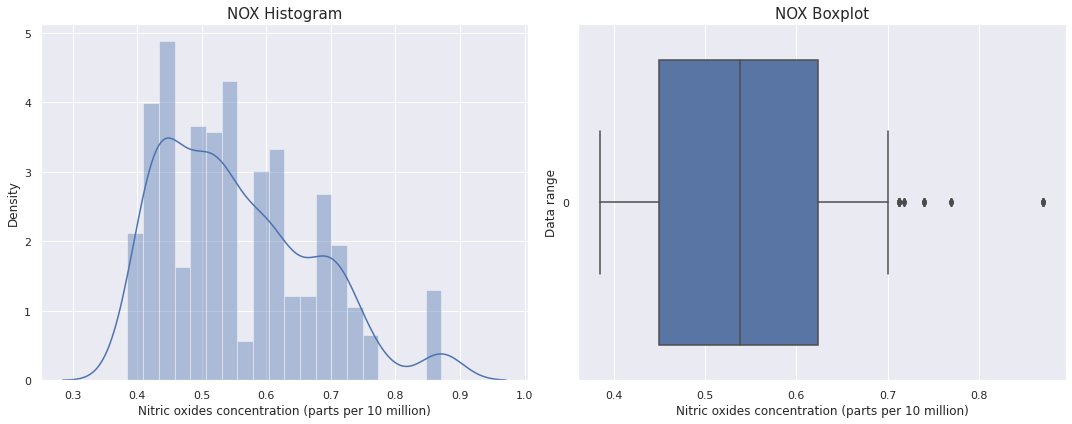

In [8]:
# Select only the NOX column from the dataframe
NOX_data = boston_data_dict['data'][:,4]

fig, axs = plt.subplots(1, 2,figsize=(15, 6),sharey=False, tight_layout=True)
# Plot the histogram 
sns.distplot(NOX_data, ax=axs[0], bins=20)
axs[0].set_title('NOX Histogram', fontdict={'fontsize': 15})
axs[0].set_xlabel("Nitric oxides concentration (parts per 10 million)")

# Plot the Box plot
sns.boxplot(data=NOX_data, ax=axs[1], orient='h', whis=0.5);
axs[1].set_title('NOX Boxplot', fontdict={'fontsize': 15})
axs[1].set_xlabel("Nitric oxides concentration (parts per 10 million)")
axs[1].set_ylabel("Data range") #check
plt.show()

As we can see from the histogram the distribution has a normal like shape. It is quite clear from the data the Nitric oxide concentration parts per 10 million lies in the range of $0.4-0.9$ with a higher concentration in the range $0.4-0.55$

#### 1.3
#### Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

In [9]:
## Correlation matrix
corr_matrix = np.array(boston_df.corr())
corr_matrix[:2]

array([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
        -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,  0.58276431,
         0.28994558, -0.38506394,  0.45562148],
       [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371,
         0.31199059, -0.56953734,  0.66440822, -0.31194783, -0.31456332,
        -0.39167855,  0.17552032, -0.41299457]])

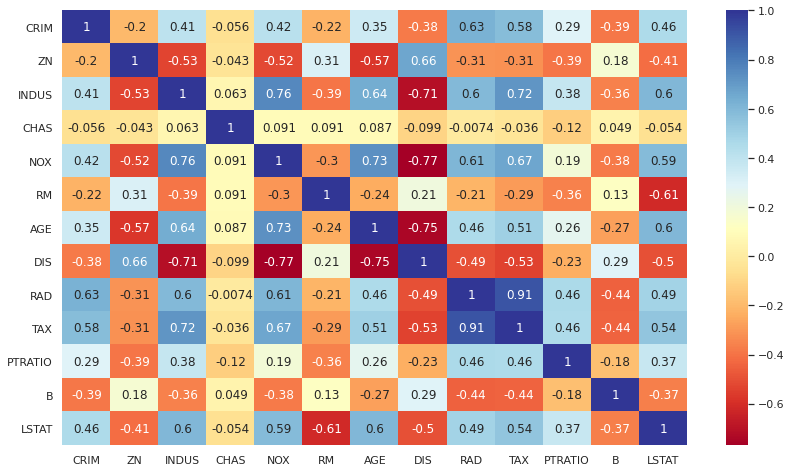

In [10]:
# Correlation heatmap
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(boston_df.corr(), cmap='RdYlBu', annot=True);

In [11]:
# We find the correlated feature 
max_corr = np.absolute(np.triu(corr_matrix, k=1)).max()
max_corr_indices = np.where(np.absolute(np.triu(corr_matrix, k=1)) == max_corr)
print(boston_df.columns[max_corr_indices[0][0]], "and", boston_df.columns[max_corr_indices[1][0]], "are the most corelated atributes with maximal corelation of: ", max_corr)

RAD and TAX are the most corelated atributes with maximal corelation of:  0.9102281885331822


We have found that the two most correlated pairs are: $$ \rho(RAD, TAX) =  0.91$$

This is quiter a strong positive correlation and it is unusual or rather unexpected to see that $RAD$ (index of accessibility to radial highways) is strongly positivly correlated with $TAX$ ( full-value property-tax rate per \$10,000).

We can possibly suggest a justification for this as, the more accessable radial highways are the higher the chance you live in a city where we would find higher property tax.

The unusual feature could be the $CHAS$ feature. As we can see from the heatmap, it is very much uncorrelated with all the other features.
   

#### 1.4
#### Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

In [12]:
#find the maximum values index for each row.
max_index_list = np.argmax(np.absolute(np.triu(corr_matrix, k=1)), axis=1)
#create nparray that holds the values index and the value itself
pairwise_corr = np.array(list(zip(boston_df.columns[np.arange(len(max_index_list))], 
                                  boston_df.columns[max_index_list], 
                                  np.absolute(np.triu(corr_matrix, k=1))[np.arange(13), max_index_list])))
#sorts them from smallest to biggest
pairwise_corr_sorted = pairwise_corr[pairwise_corr[:,2].argsort()]

In [13]:
corr_pair1 = pairwise_corr_sorted[len(pairwise_corr_sorted)-1]
corr_pair2 = pairwise_corr_sorted[len(pairwise_corr_sorted)-2]
corr_pair1, corr_pair2

(array(['RAD', 'TAX', '0.9102281885331822'], dtype='<U18'),
 array(['NOX', 'DIS', '0.7692301132258261'], dtype='<U18'))

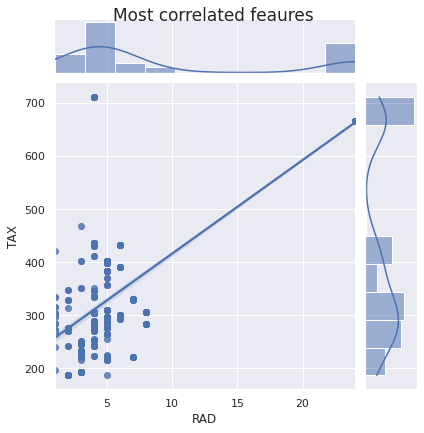

In [14]:
# Most correlated features
sns.jointplot(x=corr_pair1[0], y=corr_pair1[1], kind="reg", data=boston_df, marginal_kws=dict(bins=10))
plt.suptitle('Most correlated feaures', fontsize=17, x=0.5, y=1)
plt.show()

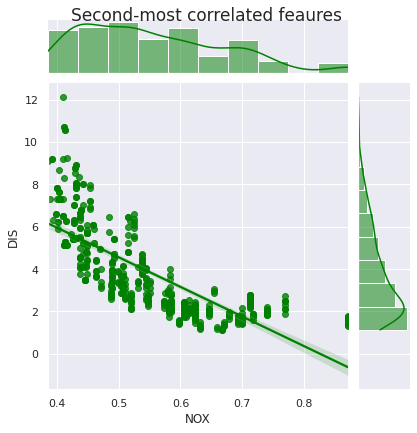

In [15]:
# Second most correlated features
sns.jointplot(x=corr_pair2[0], y=corr_pair2[1], kind="reg", data=boston_df, marginal_kws=dict(bins=10), color="green")
plt.suptitle('Second-most correlated feaures', fontsize=17, x=0.5, y=1)
plt.show()

#### 1.5 
#### Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)


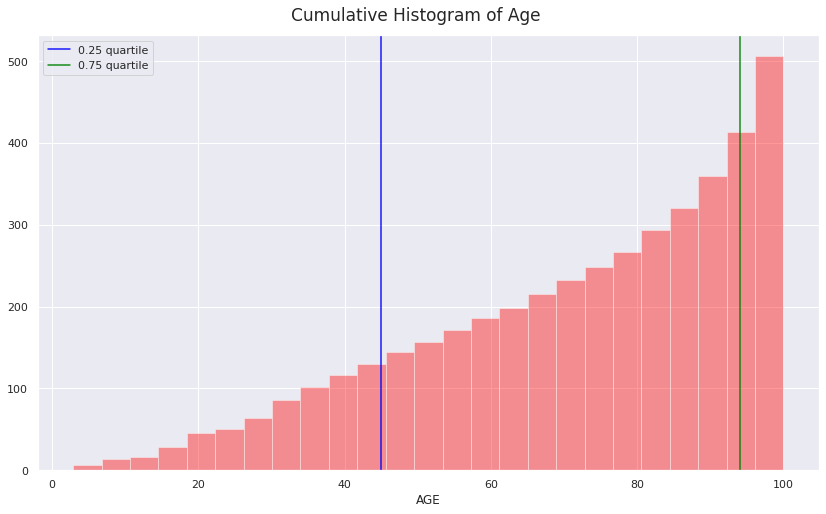

In [16]:
# We can plot cumulative plots using sns
sns.distplot(boston_df['AGE'], kde=False, bins = 25, hist_kws=dict(cumulative=True), color="red")
# We need to add the quartile lines
plt.axvline(np.quantile(boston_df['AGE'], 0.25), color="blue", alpha=0.9, label="0.25 quartile")
plt.axvline(np.quantile(boston_df['AGE'], 0.75), color="green", alpha=0.9, label="0.75 quartile")
plt.suptitle('Cumulative Histogram of Age', fontsize=17, x=0.5, y=0.93)
plt.legend()
plt.show()

#### 1.6 
#### Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

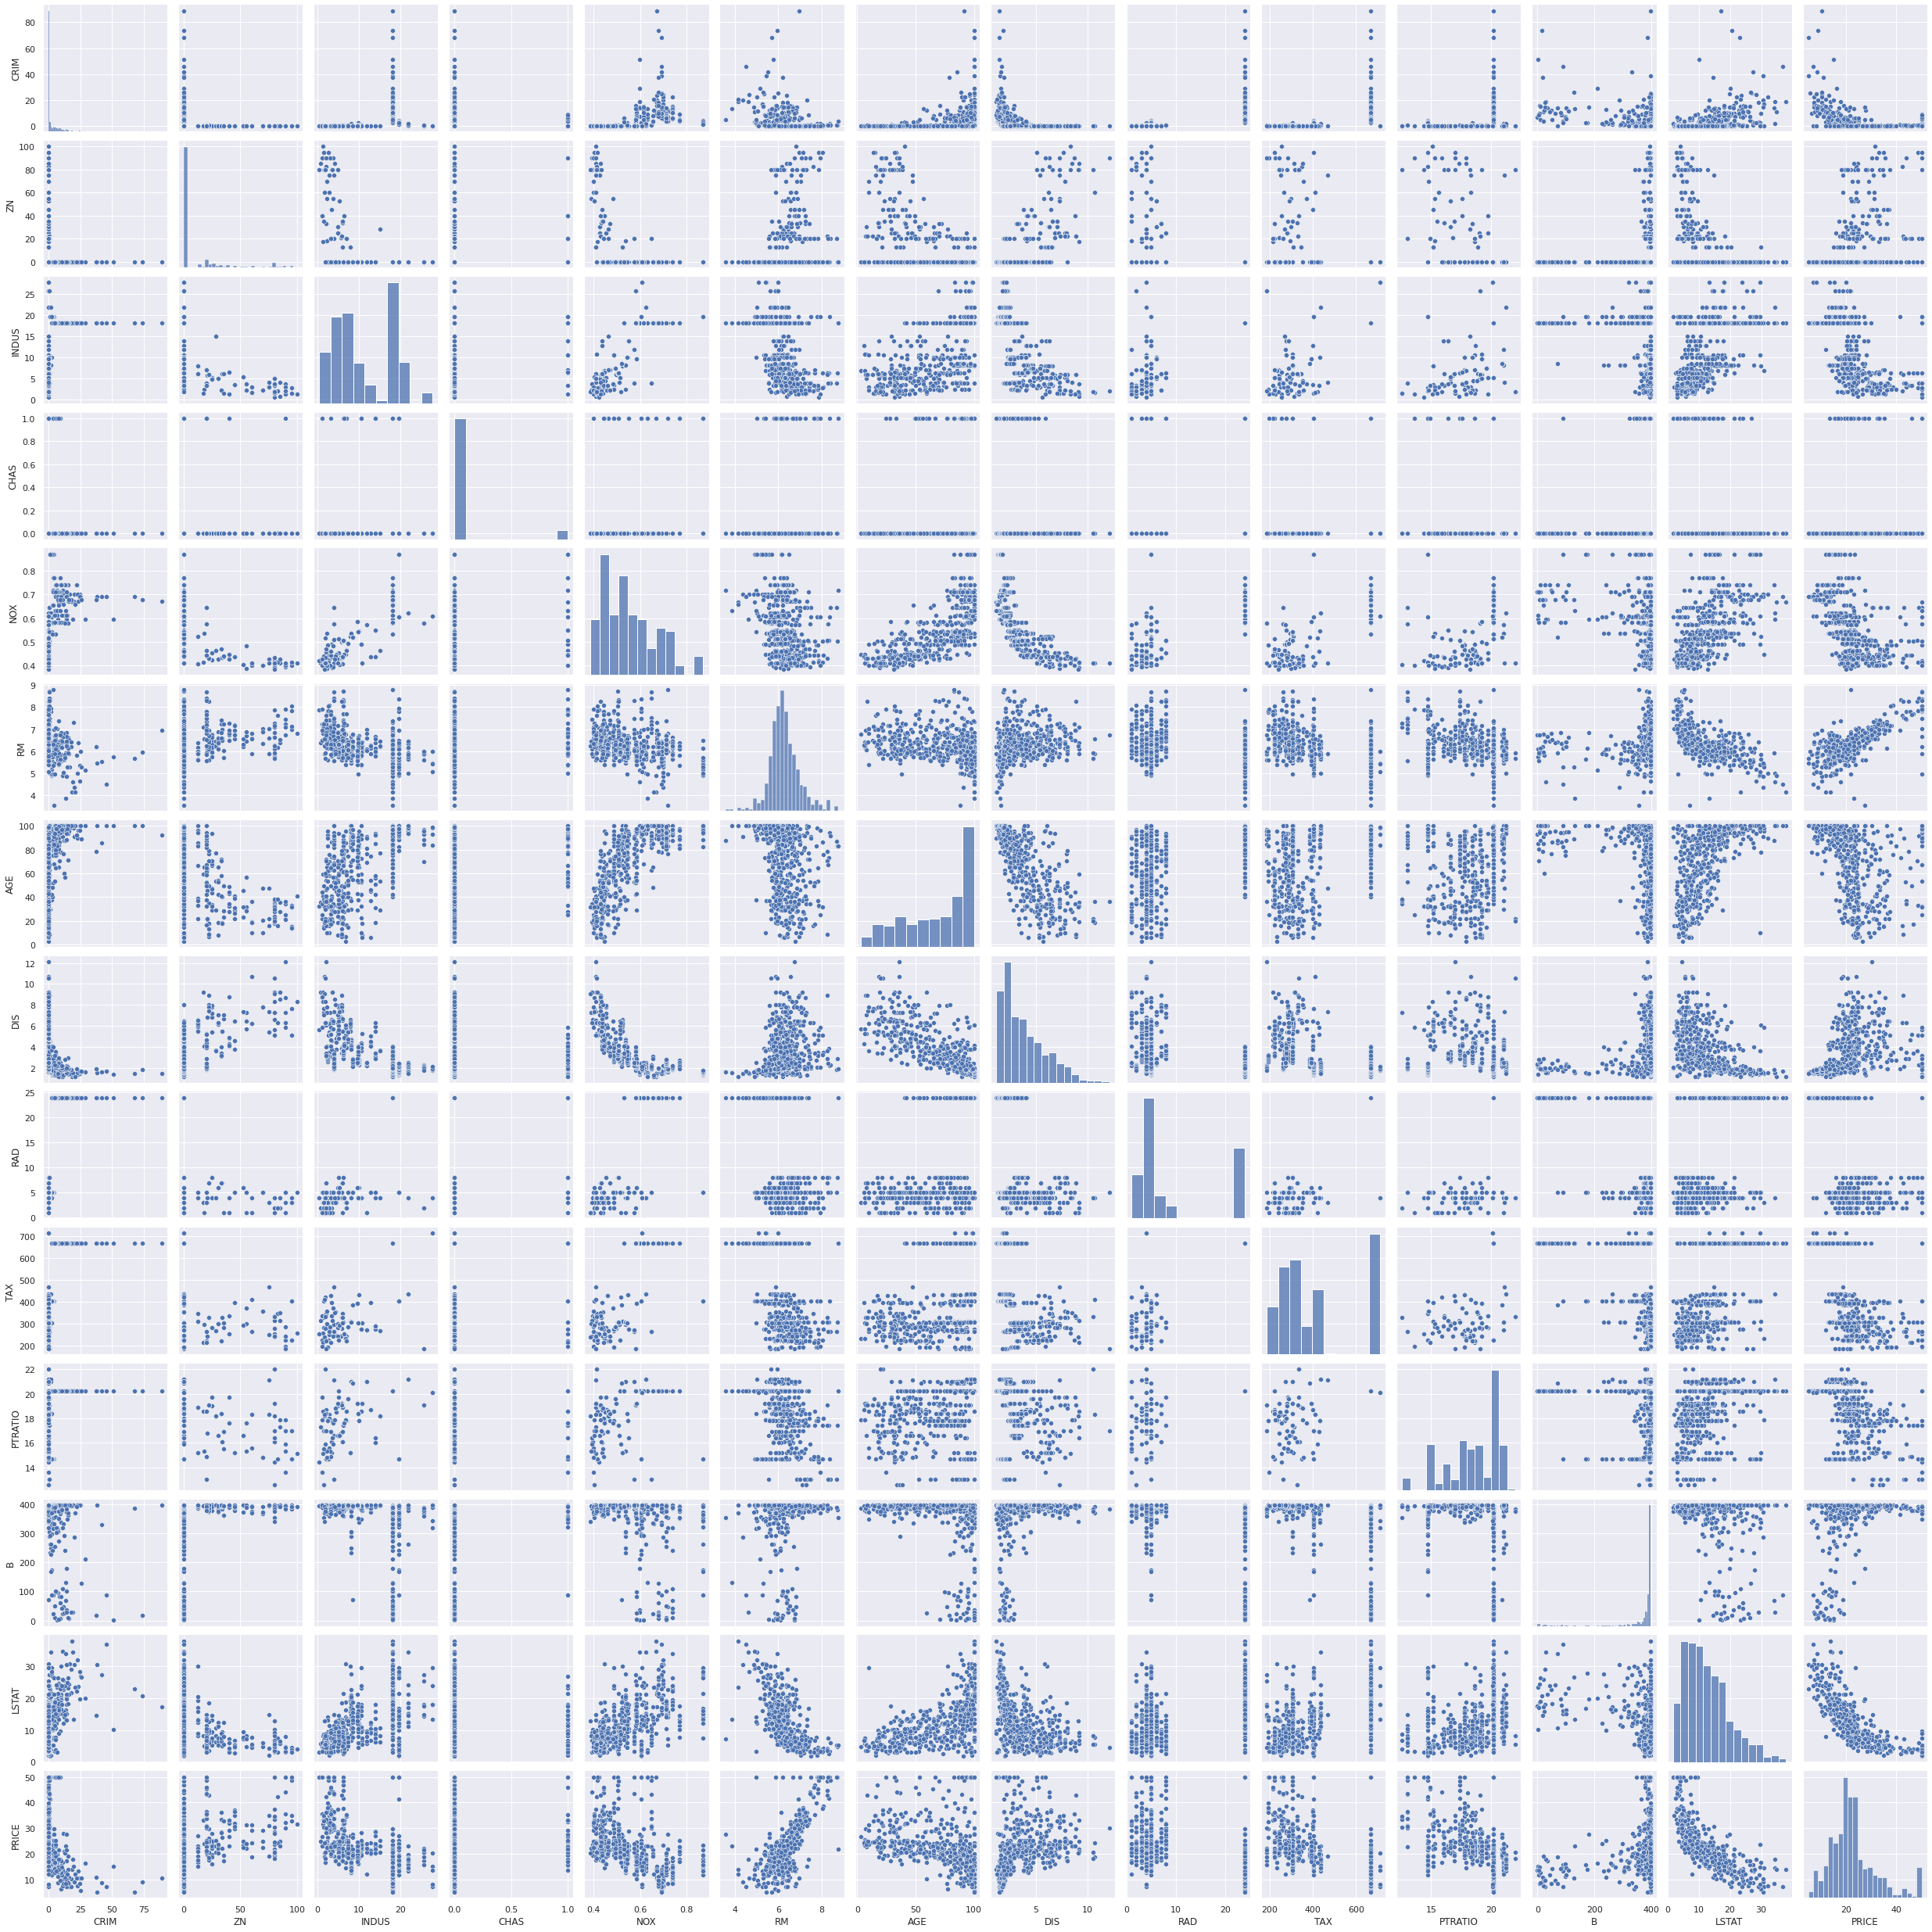

In [17]:
# We want to understand different relationships between each pair of features within the data
sns.pairplot(boston_df_with_price);

1.1 The first interesting trend we can see is that there is a relatively strong positive correlation between NOX and INDUS.
This has an explainable relation, as the proportion of non-retail business acres per town goes up, it makes sense that level of nitric oxides concentration (parts per 10 million) will go up.


1.2 The second interesting trend we can see is that there is a strong negative correlation between DIS and AGE.
We can see that as the proportion of owner-occupied units built prior to 1940 goes up then the weighted distances to five Boston employment centres goes down.


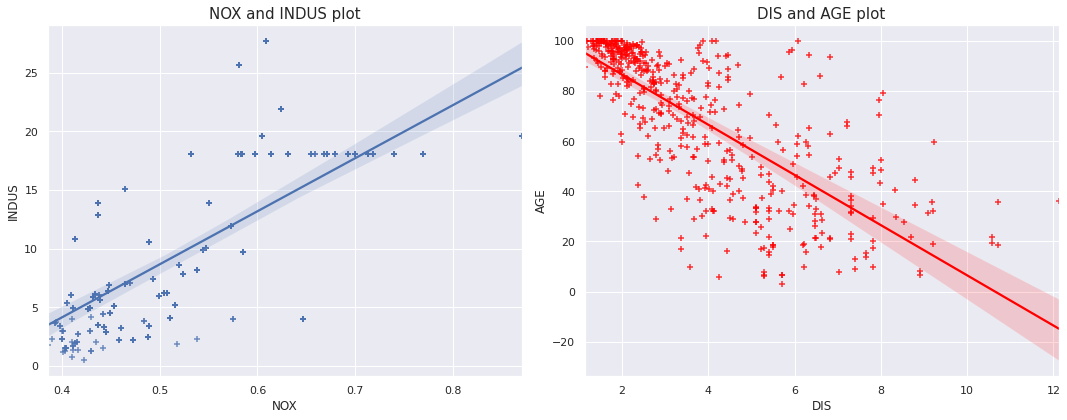

In [18]:
fig, axs = plt.subplots(1, 2,figsize=(15, 6),sharey=False, tight_layout=True)
# First interesting trend
NOX = boston_df['NOX']
INDUS = boston_df['INDUS']
sns.regplot(NOX, INDUS, ax=axs[0], ci=100, marker="+")
axs[0].set_title('NOX and INDUS plot', fontdict={'fontsize': 15})

# Second interesting trend
DIS = boston_df['DIS']
AGE = boston_df['AGE']
sns.regplot(DIS, AGE, ax=axs[1], ci=100, marker="+", color="red")
axs[1].set_title('DIS and AGE plot', fontdict={'fontsize': 15})
plt.show()

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your answer is yes, provide an example.
If your answer is no, provide a proof.

<b> Answer:  </b><br>
<b>Proof:</b><br>
We saw in class the following formula:
$$P(X) =\frac{1}{2\pi^{\frac{d}{2}}\cdot \begin{vmatrix}
\sum 
\end{vmatrix}^\frac{1}{2}}\cdot e^-\frac{1}{2}\cdot(X-\mu )^t\cdot{\sum}^{-1}\cdot(X-\mu ) $$ <br>

We begin by denoting the following: 
$$ \underset{X}{\rightarrow} = [x_1,x_2,x_3] ,$$<br> $$  \mu =[\mu_1,\mu_2,\mu_3] ,$$<br> $$ 
\sum =\begin{bmatrix}\sigma_1^2 & 0 & 0\\ 0& \sigma_2^2 &0 \\ 0& 0 & \sigma_3^2\end{bmatrix}$$

<b>Note:</b> Since the gussians are pairwise independant our covariance matrix is a diagnol matrix with zero in all the covariance entries.

<br>
Expanding our formula above we get: 

$$P(\begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}) =\frac{1}{2\pi^{\frac{3}{2}}\cdot (\sigma_1^2\sigma_2^2\sigma_3^2)^\frac{1}{2}}\cdot e^{-\frac{1}{2}\cdot(\begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}-\begin{bmatrix}\mu_1\\\mu_2\\\mu_3 \end{bmatrix} )^t\cdot{\begin{bmatrix}
\sigma_1^2 & 0 & 0\\ 0& \sigma_2^2 &0 \\ 0& 0 & \sigma_3^2 
\end{bmatrix}}^{-1}\cdot(\begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}-\begin{bmatrix}\mu_1\\\mu_2\\\mu_3 \end{bmatrix} )}$$
<br>
$$={\frac{1}{2\pi^{\frac{3}{2}}\cdot (\sigma_1^2\sigma_2^2\sigma_3^2)^\frac{1}{2}}\cdot e^{\frac{1}{2}\cdot(({\frac{x_1 - \mu_1}{\sigma_1})}^2+{(\frac{x_2 - \mu_2}{\sigma_2})}^2+{(\frac{x_3 - \mu_3}{\sigma_3})}^2)}}$$

<br>
$$={(\frac{1}{2\pi^{\frac{1}{2}}\cdot\sigma_1}\cdot e^{\frac{1}{2}\cdot(({\frac{x_1 - \mu_1}{\sigma_1})}^2)})}\cdot{(\frac{1}{2\pi^{\frac{1}{2}}\cdot\sigma_2}\cdot e^{\frac{1}{2}\cdot(({\frac{x_2 - \mu_2}{\sigma_2})}^2)})} \cdot {(\frac{1}{2\pi^{\frac{1}{2}}\cdot\sigma_3}\cdot e^{\frac{1}{2}\cdot(({\frac{x_3 - \mu_3}{\sigma_3})}^2)})}$$
<br>

$$ = P(X = x_1)\cdot P(X = x_2)\cdot P(X = x_3)$$
<br>

Therefore, in conclusion, we get that $$P(X) = P(X = x_1)\cdot P(X = x_2)\cdot P(X = x_3)$$
<br>
Which we conclude by definition of independance, that a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

<b> Answer: </b><br>

We will consider the most extreme case in order to have a lower bound for how many parameters we need per distrabution.<br> 
Consider the distrabution with $n$ balls in a bag and $n$ different probabilities for each ball. Then we would need $n-1$ parameters, one for each ball except the last one where we use the fact that the probabilites must sum of to 1 to workout the probability.

<br>
Now, consider when $X$,$Y$ and $Z$ are all the distrabution above, each entry is dependant on the multiplication of the other parameters, therefore we require, $n\cdot m \cdot k$ different entries, and $-1$ as we can work out the last entry.

<br>
Therefore, in total the number of different entries that we require are: $$n\cdot m \cdot k -1$$ 

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

<b> Answer: </b><br>
Using the same example as above, in this case we have that each entry in now independant of the others and therefore not dependant on the multiplication of the other paraneters, therefore we require, $n + m + k$ different entries.

<br>
Therefore, in total the number of different entries that we require are: $$n+ m + k$$ 

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

<b> Answer: </b><br>
As seen in lecture if we now know that $X$ and $Y$ are conditionaly independent given $Z$ then we have the following:
$$𝑃(𝑋=𝑥∧𝑌=𝑦|Z=z)=𝑃(𝑋=𝑥|Z=z)⋅𝑃(𝑌=𝑦|Z=z)$$
<br>
Therefore, there are $n+m$ options for $X∧Y$ whom are indepedant of $Z$ therefore we require, $(n + m) \cdot k$ different entries.

<br>
Therefore, in total the number of different entries that we require are: $$(n + m) \cdot k$$ 

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

<b> Answer:</b><br>


We will begin by describing an example and then derive the joint distributions and show conditonal independance:

We are given fair coins2 coins. One coin is randomly chosen and flipped twice.

We denote the random variables as follows: 
$$Z = Face \space that \space comes \space up \space for \space the \space  1^{st} \space and \space 2^{nd} \space flip $$
$$X = Face \space that \space comes \space up \space for \space the \space  1^{st} \space and \space 2^{nd} \space flip $$
$$Y = Face \space that \space comes \space up \space for \space the \space  1^{st} \space and \space 2^{nd} \space flip  $$
<br>
It is clear that since heads and tails have a 'hardcoded' colour then $X$ and $Y$ are conditonally independant given our choice in the coin ($Z$) <br>

We prove conditonal independance:

$$𝑃(𝑋=H∧𝑌=B|Z=1) = \frac{𝑃(𝑋=H∧𝑌=B∧Z=1)}{𝑃(Z=1)} = \frac{1}{4}$$ <br>
$$𝑃(𝑋=H|Z=1)⋅𝑃(𝑌=B|Z=1) = \frac{𝑃(𝑋=H∧Z=1)}{𝑃(Z=1)}*\frac{𝑃(𝑌=B∧Z=1)}{𝑃(Z=1)}= \frac{1}{2}*\frac{1}{2} =  \frac{1}{4} $$<br>
$$𝑃(𝑋=H∧𝑌=B|Z=1) =𝑃(𝑋=H|Z=1)⋅𝑃(𝑌=B|Z=1) $$

This can be continued for every case thus, we have conditonal indepedance given $Z$.


### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [19]:

gmd_data = pd.read_csv('GMD_2021.csv').values
gmd_data = gmd_data[:,1].reshape(-1, 1)
gmd_data.shape

(799, 1)

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### 3.A.1 - First Method: Looking at the data
We will plot the data and give a visual guess as to what we expect the different parameters to be.

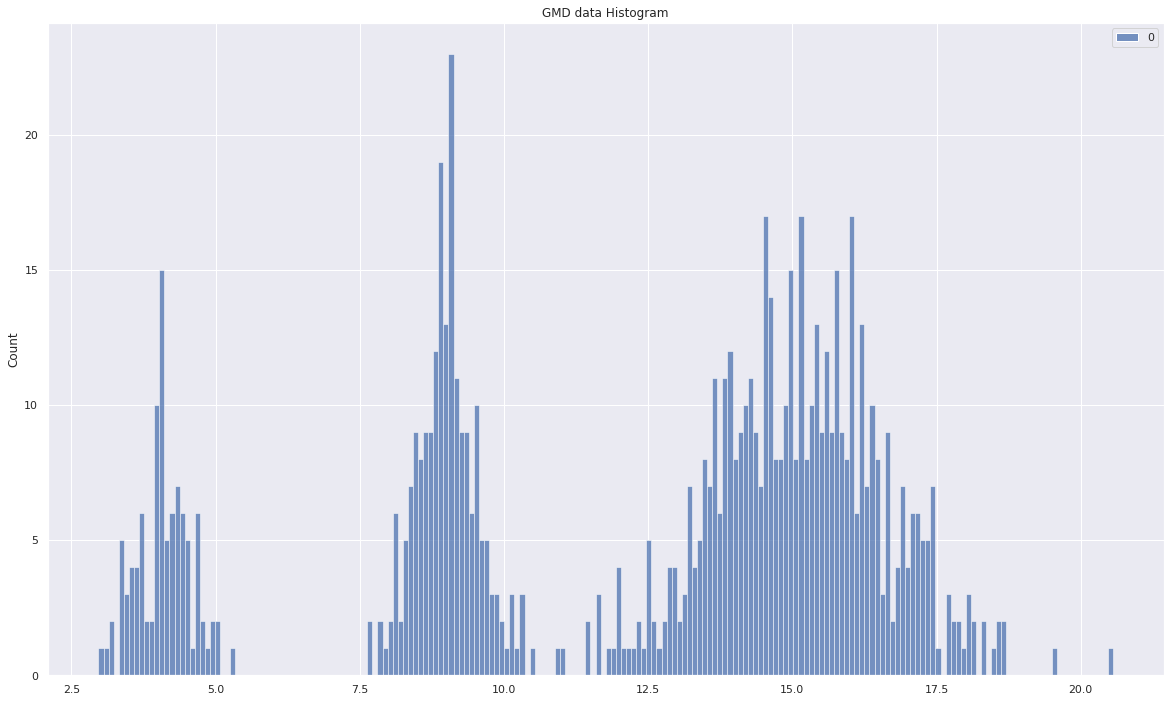

In [20]:
fig, axes = plt.subplots(1,1, figsize=(20,12))
sns.histplot(gmd_data, ax=axes, bins=200)
axes.set_title("GMD data Histogram")
plt.show()

Now we will try and calculate the weights by summing up the amount of data points between different ranges. The ranges are dependant on the visual distrabution of the data. And by looking at the way the data is distributed we can guess the missing mean 

In [21]:
# Determining the weights by the amount of samples in given ranges; ranges found from the visual graph above
w1 = (((0 < gmd_data) & (gmd_data < 7.5)).sum())/len(gmd_data)
w2 = ((( 7.5 <= gmd_data) & (gmd_data < 11.5)).sum())/len(gmd_data)
w3 = ((11.5 <= gmd_data).sum())/len(gmd_data)
weights_1 = [w1,w2,w3]
# Missing mean is founnd by studying the graph above
means_1 = [4,9,15.0]

In [22]:
print("Weights:\n",weights_1)
print("Means:\n",means_1)

Weights:
 [0.12390488110137672, 0.2565707133917397, 0.6195244055068836]
Means:
 [4, 9, 15.0]


#### 3.A.2 - Second Method: EM for GMM
We will use the Expectation Maximization for GMM in order to learn the models parameters. Sklearn has a built in function which we can use.

In [23]:
# Setting alreadying known data and unknown data as random
mu1,mu2,mu3 = 4,9, np.random.randint(0,gmd_data.max())
sig1,sig2,sig3 = 0.5,0.5,1.5
w1,w2 = np.random.uniform(0.1, 0.19),0.25
w3 = 1-w1-w2
print("Random Weights selected",w1,w2,w3)

Random Weights selected 0.15448465605616046 0.25 0.5955153439438395


In [26]:
class EM(object):
    def __init__(self, k=3, n_iter=20):
        self.k = k
        self.n_iter = n_iter
       
    # initial guesses for parameters
    def init_params(self, data):
        mu1,mu2,mu3 = 4,9, np.random.randint(0,gmd_data.max())
        sig1,sig2,sig3 = 0.5,0.5,1.5
        w1,w2 = np.random.uniform(0.1, 0.19),0.25
        w3 = 1-w1-w2
        self.w = [w1,w2,w3]
        self.mean_arr = [mu1,mu2,mu3]
        self.sigma_arr = [sig1,sig2,sig3]
        self.resp = []
        return(self.w, self.mean_arr, self.sigma_arr)
        
        
    def expectation(self, data):
        # Calculate pdfs
        norm_pdf_calc = [[],[],[]]
        for j in range(len(data)):
            x = data[j]
            Sigma_x_k = 0
            for i in range(self.k):
              Sigma_x_k += stats.norm(self.mean_arr[i], self.sigma_arr[i]).pdf(x) * self.w[i]
            for i in range(self.k):
              norm_pdf_calc[i].append(stats.norm(self.mean_arr[i], self.sigma_arr[i]).pdf(x) * self.w[i] / Sigma_x_k)
        self.resp = np.array(norm_pdf_calc)
        return(self.resp)
            
   
    def maximization(self, data):
        new_w = []
        new_mean_arr = []
        new_sigma_arr = []
        
        for k in range(self.k):
            # get k-th responsibility
            resp_k = self.resp[k].mean()
          
            # Calc new weight
            new_w.append(resp_k)
     
            # Calc new mean
            temp = np.sum(self.resp[k] * data)
            new_mean_arr.append(temp * (1 / (new_w[k]*data.shape[0])   ))
         
        # Set the current variables to the new ones    
        self.w[2] = new_w[2]
        self.mean_arr[2] = new_mean_arr[2]
        return(self.w, self.mean_arr , self.sigma_arr)

    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        iteration = 0
        self.init_params(data)
        while ((iteration < self.n_iter)):
    
            self.expectation(data)
   
            self.maximization(data)
            iteration+=1

In [27]:
gmm = EM()
gmm.init_params(gmd_data)
gmm.fit(gmd_data)

In [28]:
weights_2 = gmm.w
means_2 = gmm.mean_arr

In [29]:
print("Weights:\n",weights_2)
print("Means:\n",means_2)

Weights:
 [0.12601761037189815, 0.25, 0.6259728569746557]
Means:
 [4, 9, 15.10104661652418]


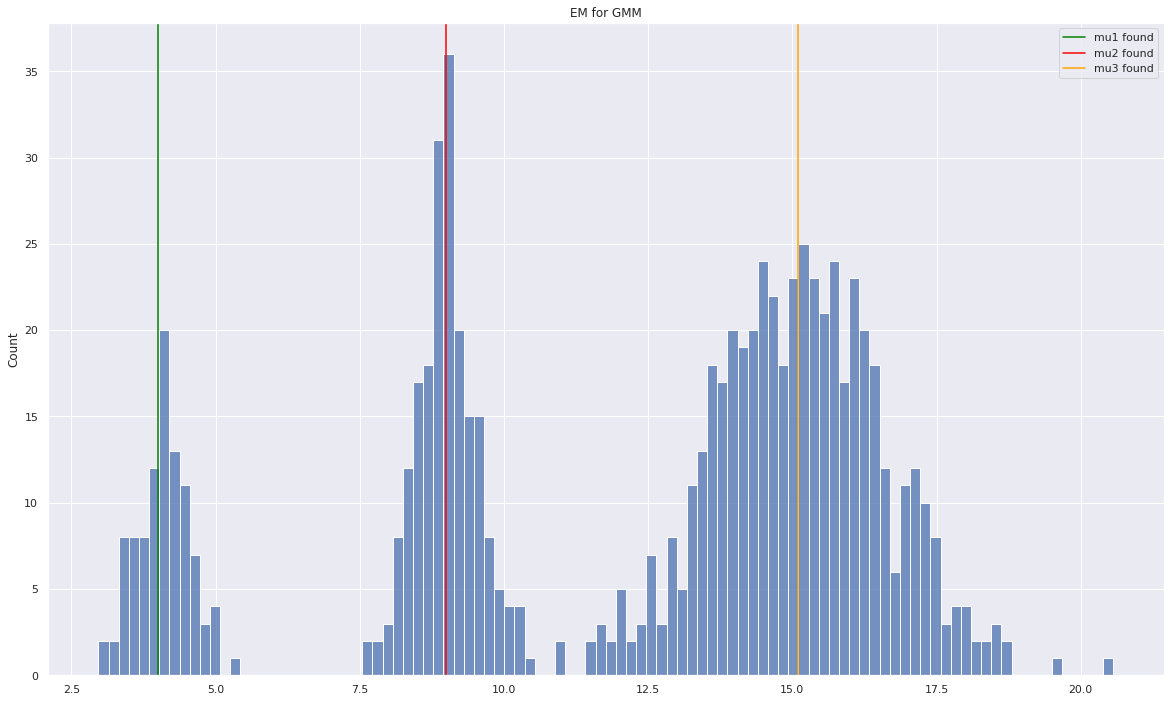

In [30]:
fig, axes = plt.subplots(1,1, figsize=(20,12))
sns.histplot(gmd_data, ax=axes, bins=100)
axes.axvline(means_2[0], color="green", label="mu1 found")
axes.axvline(means_2[1], color="red", label="mu2 found")
axes.axvline(means_2[2], color="orange", label="mu3 found")
axes.set_title("EM for GMM")
plt.legend()
plt.show()

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

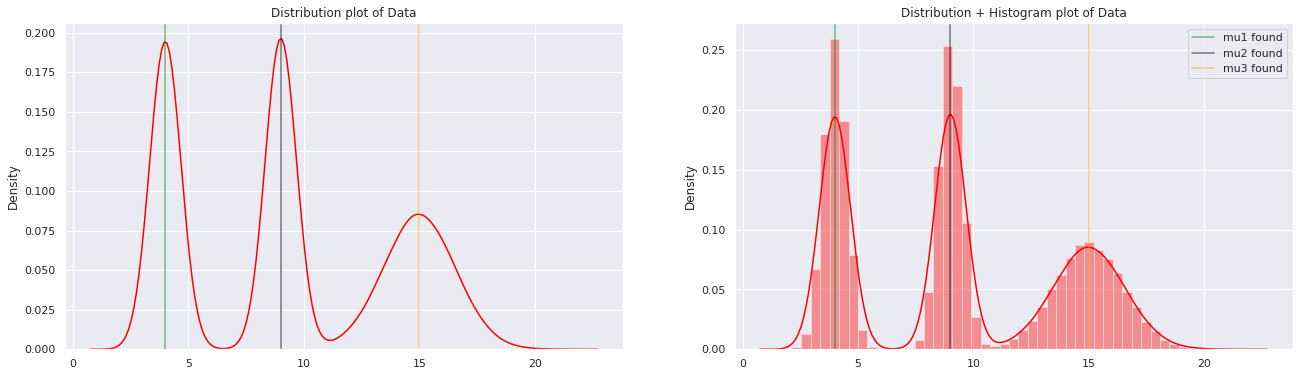

In [31]:
n = 100000 # number of sample to be drawn
mu = [4,9,15]
sigma = [0.5, 0.5, 1.5]
samples = []
fig, axes = plt.subplots(1,2, figsize=(22,6))
for i in range(n): # iteratively draw samples
    Z = np.random.choice([0,1,2]) # latent variable
    samples.append(np.random.normal(mu[Z], sigma[Z], 1))
sns.distplot(samples, ax=axes[0],hist=False, bins=100, color="red")
axes[0].set_title("Distribution plot of Data")
sns.distplot(samples,ax=axes[1],color="red")
axes[1].set_title("Distribution + Histogram plot of Data")

axes[0].axvline(means_1[0], color="green", alpha=0.5,label="mu1 found")
axes[0].axvline(means_1[1], color="black", alpha=0.5,label="mu2 found")
axes[0].axvline(means_1[2], color="orange", alpha=0.5,label="mu3 found")

axes[1].axvline(means_1[0], color="green", alpha=0.5,label="mu1 found")
axes[1].axvline(means_1[1], color="black", alpha=0.5,label="mu2 found")
axes[1].axvline(means_1[2], color="orange", alpha=0.5,label="mu3 found")
plt.legend()
plt.show()

From the given data we have learnt the pdf plotted above. And as can be seen above, we have plotted a guassian mixture model. The data provided allowed us to understand that the range of the data is unlikly to surpass the late 20's and therefore the pdf plot doesnt require to be drawn much further than that.

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, \mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

<b>The first way: Direct method</b><br>
We can draw three gaussians using the parameters of $\mu$ = [$\mu_1+3, \mu_2+5, \mu_3+7$ ] and $\sigma$ = 1. We then sample data directly from the distrabutions in a uniform manner seeing as tall the weights are equal.

<b>The second way: Inverse Method</b><br>
We begin by choosing random numbers within the uniform distribution and then use the inverse method showed in recitation, when we use the $ppf$ to generate the data.


#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


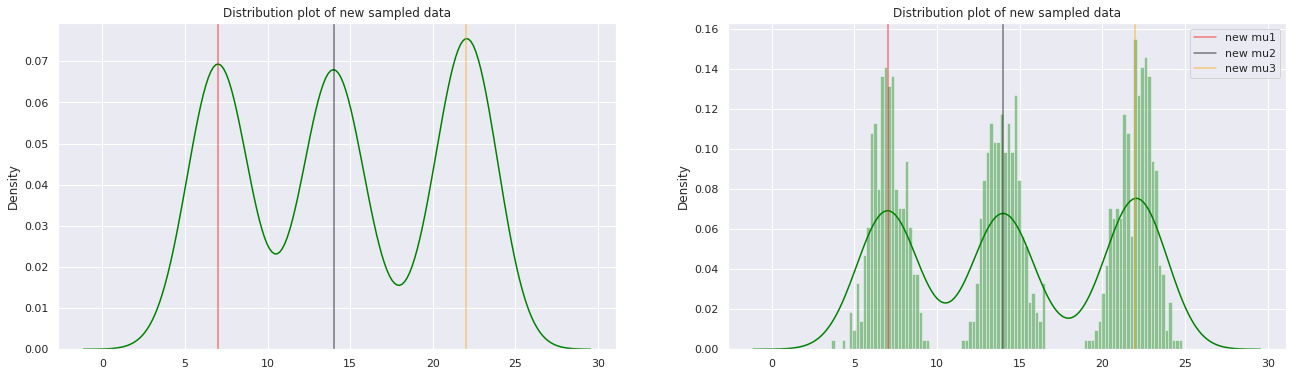

In [32]:
n = 1000 # number of sample to be drawn
mu = [means_1[0]+3,means_1[1]+5,means_1[2]+7]
samples = []
fig, axes = plt.subplots(1,2, figsize=(22,6))
for i in range(n): # iteratively draw samples
    Z = np.random.choice([0,1,2]) # latent variable
    samples.append(np.random.normal(mu[Z], 1, 1))
sns.distplot(samples,ax=axes[0], hist=False, bins=300, color="green")
axes[0].set_title("Distribution plot of new sampled data")
sns.distplot(samples,ax=axes[1],bins=100, color="green")
axes[1].set_title("Distribution plot of new sampled data")

axes[0].axvline(means_1[0]+3, color="red", alpha=0.5,label="new mu1")
axes[0].axvline(means_1[1]+5, color="black", alpha=0.5,label="new mu2")
axes[0].axvline(means_1[2]+7, color="orange", alpha=0.5,label="new mu3")

axes[1].axvline(means_1[0]+3, color="red", alpha=0.5,label="new mu1")
axes[1].axvline(means_1[1]+5, color="black", alpha=0.5,label="new mu2")
axes[1].axvline(means_1[2]+7, color="orange", alpha=0.5,label="new mu3")
plt.legend()
plt.show()

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


In [33]:
# Generating random data points and using the ppf to get the data
q=np.random.rand(333)
result1 = np.array(stats.norm.ppf(q,loc=means_1[0]+3,scale=1))
q=np.random.rand(333)
result2 = np.array(stats.norm.ppf(q,loc=means_1[1]+5,scale=1))
q=np.random.rand(334)
result3 = np.array(stats.norm.ppf(q,loc=means_1[2]+7,scale=1))
samples = np.concatenate((result1, result2, result3))

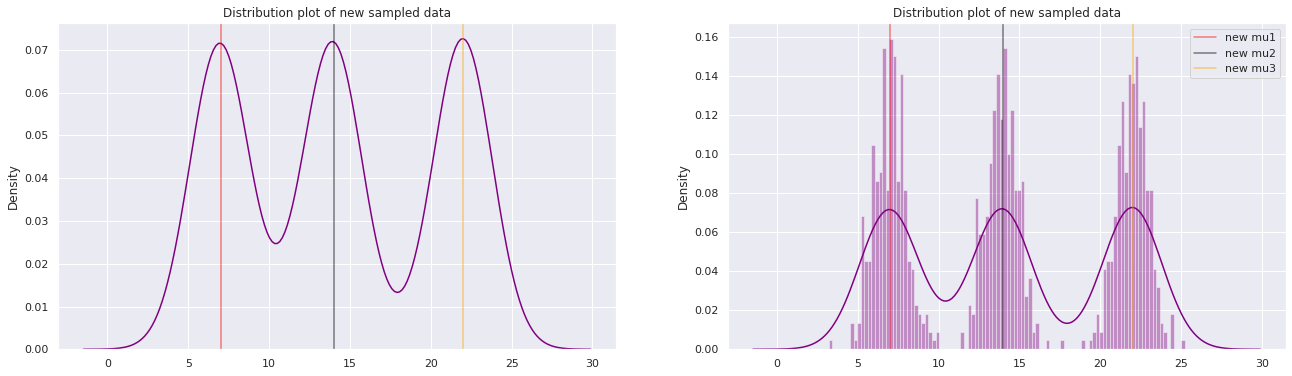

In [34]:
# Plotting the data
fig, axes = plt.subplots(1,2, figsize=(22,6))
sns.distplot(samples,ax=axes[0], hist=False, bins=300, color="purple")
axes[0].set_title("Distribution plot of new sampled data")
sns.distplot(samples,ax=axes[1],bins=100, color="purple")
axes[1].set_title("Distribution plot of new sampled data")

axes[0].axvline(means_1[0]+3, color="red", alpha=0.5,label="new mu1")
axes[0].axvline(means_1[1]+5, color="black", alpha=0.5,label="new mu2")
axes[0].axvline(means_1[2]+7, color="orange", alpha=0.5,label="new mu3")

axes[1].axvline(means_1[0]+3, color="red", alpha=0.5,label="new mu1")
axes[1].axvline(means_1[1]+5, color="black", alpha=0.5,label="new mu2")
axes[1].axvline(means_1[2]+7, color="orange", alpha=0.5,label="new mu3")
plt.legend()
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [35]:
mu = 70_000
sd = 30_000
norm = stats.norm(loc=mu, scale=sd)

#### 4.A
What percent of people earn less than 50,000 RCU?

The percentage of people earn less than 50,000 RCU: $P(x < 50,000) $

In [36]:
norm.cdf(50_000)

0.2524925375469229

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

The percentage of people earn between 45,000 RCU and 65,000 RCU: $P(x < 65,000) - P(x < 45,000)$

In [37]:
norm.cdf(65_000) - norm.cdf(45_000)

0.23148778642545326

#### 4.C
What percent of people earn more than 70,000 RCU?

The percentage of people earn more than 70,000 RCU: $1 - P(x < 70,000)$

In [38]:
1-norm.cdf(70_000)

0.5

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [39]:
employees = 1_000
one_employee_prob = (1 - norm.cdf(140_000))
total_amount = np.round(employees * one_employee_prob)
print("The total amount out of 1,000 employees earning more than 140,000RCU is:", total_amount, "and that is a total percentage of",total_amount/ employees, "%.")

The total amount out of 1,000 employees earning more than 140,000RCU is: 10.0 and that is a total percentage of 0.01 %.


#### 4.E
<span style="color:red"> This question was slightly updated due to a subtlety in the phrasing </span>

A survey is performed on employees of the company. **20 groups of 50 employees each are sampled (with replacenets).**
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

In [40]:
# Using the CLT we get
new_norm = stats.norm(loc= mu, scale=sd/50)
# Calc the probability for one group of 50
p = new_norm.cdf(70000) - new_norm.cdf(50000)
# Use binom distrabution for the 20 groups
binom = stats.binom(p=p, n=20)
1 - binom.cdf(10)

0.4119014739990232

### Question 5 - Coupon collector

In [41]:
 # number of coupons
n = 20

In [42]:
def coupon_mean(n):
  mean = 0.0
  for x in range(n):
    geom_i = stats.geom((n - x) / n)
    mean +=  geom_i.mean()
  return mean

In [43]:
def coupon_var(n):
  var = 0.0
  for x in range(n):
    geom_i = stats.geom((n - x) / n)
    var +=  geom_i.var()
  return var

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [44]:
print(coupon_mean(n))

71.95479314287363


#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [45]:
print(coupon_var(n))

566.5105044223355


#### 5.C
Write code to exactly compute $P(T_{20}>40)$

In [46]:
#calculate 1-P(T_20 = 20..39)
#(X_1 + ... + X_20 > 40)
# Memoization table for fast computation
dict_table = {}
def coupon_cdf(dict_table, how_much_we_have, num_of_tries_left, coupons):
  p = (coupons - how_much_we_have) / coupons
  if how_much_we_have >= coupons:
    dict_table[(how_much_we_have, num_of_tries_left)] = 1
    return 1
  elif coupons - how_much_we_have > num_of_tries_left:
    dict_table[(how_much_we_have, num_of_tries_left)] = 0
    return 0
  elif (how_much_we_have, num_of_tries_left) in dict_table:
    return dict_table[(how_much_we_have, num_of_tries_left)]
  else:
    res = (p * coupon_cdf(dict_table, how_much_we_have + 1, num_of_tries_left - 1, coupons)) + ((1 - p) *  coupon_cdf(dict_table, how_much_we_have, num_of_tries_left - 1, coupons))
    dict_table[(how_much_we_have, num_of_tries_left)] = res
    return res

cdf = coupon_cdf(dict_table, 0, 40, 20)
T_20 = 1-cdf
print(T_20)

0.9641122736925725


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

We are seen two different equations for Chebychev:<br>
1. $$\Pr(|X-\mu |\geq k\sigma )\leq {\frac {1}{k^{2}}}.$$
2. $$\Pr(|X-\mu |< k\sigma )\geq 1- {\frac {1}{k^{2}}}.$$

We will used the second formula to compute our bound. Firstly, in chebyshev we are calculating a bound for a random variable. Therefore, in the equation the role of $X$ is played by 30, and the $\sigma$ and $\mu$ are what we have calculated above.<br> 

Therefore, we begin by calculating our $k$. This can be achieved by substituting our values into the following rearrangment of the formula: 
$$Pr(\mu-k\sigma < X < k\sigma+\mu) $$

In [47]:
X = 40
mu = coupon_mean(n)
sigma = np.sqrt(coupon_var(n))

X, mu, sigma

(40, 71.95479314287363, 23.801481139255504)

In [48]:
# Calculating the 'k'
k = np.absolute(X-mu)/sigma
k

1.3425548164803476

Now that we have found our $k$ we can simply plug it into the formula (#2)

In [49]:
# Showing the chebyshev bound
chebyshev_bound = 1-1/k**2
chebyshev_bound

0.4452006468290487

It is clear that Chebyshev has given us a valid lower bound $= 0.4452..$ which is actually quite far away from the precise result calculated in 5.c $=0.964...$ Therefore, as discussed in lecture, chebyshev is simply a tool to better understand the probability but evidently it is not a 'tight' bound as we would like it to be. 

### End of Assignment